# Introduction to Julia

#### John Pearson and Tyler Ransom
#### SSRI
#### February 11, 2016

# Who is John?
- Research Assistant Professor (Duke Institute for Brain Sciences)
- Computational Neuroscience, Data Analysis Methods [pearsonlab.github.io](http://pearsonlab.github.io)
- serious Julia user for about 9 months

# Who is Tyler?
- lorum ipsum

# Who are you?

- What field (statistics, sociology, economics, etc.)?
- What languages are you coming from (R, Python, Stata, C/C++)?
- What types of computing?:
    - algorithms
    - optimization
    - data analysis
    - modeling

# What is Julia?

![Gaston Julia](http://katgym.by.lo-net2.de/c.wolfseher/chaos/gaston.gif)

- new programming language (public since 2012)
- brought to you by MIT, Julia Computing
- focused on scientific computing applications

- aims to be a high-level prototyping language that is also fast enough for serious simulation
    - as easy to learn and flexible as Python or R
    - within 2x the speed of C, C++, or FORTRAN
- Currently 0.4.3, soon to be 0.5, with very active developer community (more later)

# Reasons to Consider Julia

- you mostly write your own algorithms
- you need to write code that is very fast
- you’d like to prototype and optimize within the same language
- you want zero boilerplate calls to C, Python (and soon C++)
- you need powerful metaprogramming/macros
- you want access to state-of-the-art automatic differentiation and optimization
- you want to use Greek letters in variable names!
- you are interested in programming language design
- you want to get in on the ground floor


# Reasons Julia may not be for you (yet)

- you mostly use packages written by others
- you rely critically on several packages that aren't available
- you don’t have much need to optimize your code
- you perform mostly data analysis and model building, as opposed to algorithm development
- you prioritize stability and reliability 
    - (or don’t write a lot of tests for your own code)
- you don’t want to devote time to keeping up with changes
- you have zero background with compiled languages

# What makes Julia different?

- just in time (JIT) compilation
- rich type system
- multiple dispatch
- metaprogramming (programs that write programs: think C macros, STAN)
- no more fear of writing loops

More on each of these later!

# Learning Julia

- [Julia homepage](http://julialang.org/)
- [Learning resources](http://julialang.org/learning/)
- [Docs](http://julia.readthedocs.org/en/release-0.4/) 
    - more comprehensive and up-to-date than most other info
- [JuliaBox](www.juliabox.org) will let you try out Julia in a Jupyter notebook without an install
- [YouTube](https://www.youtube.com/user/JuliaLanguage)
- [GitHub](https://github.com/JuliaLang/julia)
    - this is where most of the development discussion takes place
    - being GitHub-friendly currently important
- [julia-users list](https://groups.google.com/forum/#!forum/julia-users)

# REPL time

# REPL
REPL = **R**ead **E**val **P**rint **L**oop = interactive console

- open terminal
- type `julia`
- wait for everyone to get a prompt

## Cool things you can do
- basic calculator functions
- up for last command; basic Emacs key bindings
- `;` = shell mode (but not a real shell) (though cf `run`)
- `?` = help mode (try `?run`)
- also more specific helps (`methods`, `methodswith`, later)
- finally `typeof` tells us the type of a variable or expression
    - `typeof(5)`
    - `typeof(4.3)`

# Basic Data Operations

# Other data types:

## Tuple
- collection of function arguments
- immutable => fast

In [12]:
t = (1, 2)
typeof(t)

u = "velociraptor", 2.2
typeof(u)

t[1]

# t + u  # doesn't work
 
vcat(t, u)  # also doesn't work

tuple(t, u)  # also doesn't work

((1,2),("velociraptor",2.2))

In [26]:
# detour:
# if we want to "unpack" tuples, we "splat" them with ... (cf * in Python):
tuple(t..., u)
tuple(t..., u...)

# sometimes, we want to "pack" or "slurp" tuples (careful, can cause slow vararg functions!)
function packer(z...)
    z  # no return statement; all arguments packed in z
end

aa = packer(t..., u)
typeof(aa)

Tuple{Int64,Int64,Tuple{ASCIIString,Float64}}

# Dictionary

- aka, "map," "hashmap," "associative array," "key-value store"
- some similarity to structs in Matlab or lists in R, but only slightly
- like Python dictionaries, but types matter (keys are usually all the same type, as are values)



In [38]:
# we write a pair as
p = "key" => 2.
typeof(p)

d = Dict("key" => 2, "lock" => 4.)
# typeof(d) = Dict{ASCIIString,Any}
# Any is any type of variable (Any = bad performance!)

d = Dict("key" => 2., "lock" => 4.)
# typeof(d) = Dict{ASCIIString,Float64}

keys(d)  # not d.keys()!
values(d)

for (k, v) in d  # order of iteration not guaranteed!
    println("entry: $k => $v")  # string interpolation!
end

# by convention, keys in Julia are often symbols (:a) rather than strings
d = Dict(:key => 2., :lock => 4.)
# typeof(d) = Dict{Symbol,Float64}

# more on this later (basically, symbols in Exprs don't then have to be converted from strings)
for (k, v) in d
    println("entry: $k => $v")  # string interpolation!
end

entry: key => 2.0
entry: lock => 4.0
entry: lock => 4.0
entry: key => 2.0


# Plotting things

## PyPlot

Julia has a great interface to Python 

In [45]:
using PyCall

@pyimport numpy

R = numpy.random[:rand](5, 5)

5x5 Array{Float64,2}:
 0.0647514  0.18033   0.217775  0.848302  0.890695
 0.121332   0.124491  0.908785  0.293782  0.274138
 0.0737066  0.879125  0.685128  0.654143  0.356275
 0.342729   0.443153  0.450306  0.224965  0.869675
 0.268203   0.929708  0.454929  0.43576   0.119548

# PyPlot allows us to use Matplotlib

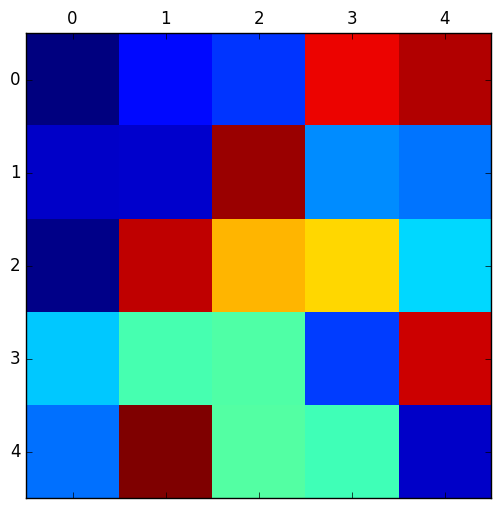

PyObject <matplotlib.image.AxesImage object at 0x317b23c10>

In [49]:
using PyPlot

matshow(R)

## Gadfly

# How Julia makes your code fast

# Just-in-time (JIT) compilation

- compilers transform written code to machine code
    - much faster
    - typically a separate step
- JIT compilers work at runtime
    - can be very fast with modern methods
- Julia uses [LLVM](http://llvm.org/) as a backend

# [The Julia compilation process](http://blog.leahhanson.us/julia-introspects.html)

- Parsing (Abstract Syntax Tree; AST)
    - macro expansion
- Code lowering
- Code typing
- LLVM
- machine code



# Julia's type system

- variables in code have types (int, float, etc.)
- compilers use type information to generate efficient code
- like objects, but focus on data, not behavior
    - [Execution in the Kingdom of Nouns](http://steve-yegge.blogspot.com/2006/03/execution-in-kingdom-of-nouns.html)
    - much more like structs in C
- use types for data, methods for behavior
- key to understanding how Julia code is organized and what makes it fast

# More on types

- two types of types:
    - Abstract: 
        - never instantiated
        - tree structure (no multiple inheritance)
    - Concrete:
        - only "leaf types"
        - fast, optimized code
- key functions:
    - `typeof`
    - `super` and `subtypes`
    - `::` and `<:`

In [1]:
typeof(1)

Int64

In [2]:
typeof(1.1)

Float64

Strings always have " ", chars have ' '

In [3]:
typeof('a')

Char

In [4]:
typeof("alphabet")

ASCIIString

We can find out about the type tree:

In [5]:
super(Float64)

AbstractFloat

In [6]:
super(AbstractFloat)

Real

In [7]:
super(Real)

Number

In [8]:
super(Number)

Any

In [9]:
super(Any)

Any

More on the type tree:

Everything is a subtype of `Any`:

In [10]:
subtypes(Any)

241-element Array{Any,1}:
 AbstractArray{T,N}                        
 AbstractChannel{T}                        
 AbstractRNG                               
 AbstractString                            
 Any                                       
 Associative{K,V}                          
 Base.AbstractCmd                          
 Base.AbstractMsg                          
 Base.AbstractZipIterator                  
 Base.Cartesian.LReplace{S<:AbstractString}
 Base.Combinations{T}                      
 Base.Count{S<:Number}                     
 Base.Cycle{I}                             
 ⋮                                         
 TypeVar                                   
 Type{T}                                   
 UniformScaling{T<:Number}                 
 Val{T}                                    
 Vararg{T}                                 
 VersionNumber                             
 Void                                      
 WeakRef                                   
 Worke

We can also test type relationships

In [11]:
isa(1.1, Float64)

true

In [12]:
Number <: Any

true

In [13]:
Real <: Number

true

In [14]:
Integer <: Real

true

In [15]:
Integer <: AbstractFloat

false

Finally, some types can have parameters (like template objects in C++/Java):

In [16]:
aa = [1:10]

10-element Array{Int64,1}:
  1
  2
  3
  4
  5
  6
  7
  8
  9
 10

In [17]:
typeof(aa)

Array{Int64,1}

In [18]:
typeof(rand(5, 5))

Array{Float64,2}

# Types: Summary

- data types in Julia form a hierarchy tree
- "leaf" types are concrete; all others abstract
    - abstract types are slow because the compiler can't specialize
- types are a way of adapting to your problem domain
    - but designing your own type hierarchy can be tricky
- type stability is key to good performance
    - but you *usually* need to type inputs

# Multiple Dispatch

If Julia's types are just data, not objects, how do we encode type behavior?

Julia (like R, C++ operators), choosing among *different* functions of the *same name* based on the types of arguments. This is called **multiple dispatch**.

In [19]:
?imag

search: 

```
imag(z)
```

Return the imaginary part of the complex number `z`


In [20]:
methods(imag)

imag UniformScaling ismatch ismarked minmax eigmax BitMatrix indmax



# 15 methods for generic function "imag":
imag(z::Complex{T<:Real}) at complex.jl:32
imag(x::Real) at complex.jl:34
imag{T<:Real}(x::Union{DenseArray{T<:Real,N},SubArray{T<:Real,N,A<:DenseArray{T,N},I<:Tuple{Vararg{Union{Colon,Int64,Range{Int64}}}},LD}}) at arraymath.jl:29
imag(A::Union{DenseArray{T,N},SubArray{T,N,A<:DenseArray{T,N},I<:Tuple{Vararg{Union{Colon,Int64,Range{Int64}}}},LD}}) at arraymath.jl:27
imag(M::SymTridiagonal{T}) at linalg/tridiag.jl:63
imag(M::Tridiagonal{T}) at linalg/tridiag.jl:320
imag(A::UpperTriangular{T,S<:AbstractArray{T,2}}) at linalg/triangular.jl:46
imag(A::LowerTriangular{T,S<:AbstractArray{T,2}}) at linalg/triangular.jl:47
imag(A::Base.LinAlg.UnitLowerTriangular{T,S<:AbstractArray{T,2}}) at linalg/triangular.jl:48
imag(A::Base.LinAlg.UnitUpperTriangular{T,S<:AbstractArray{T,2}}) at linalg/triangular.jl:49
imag(D::Diagonal{T}) at linalg/diagonal.jl:60
imag(M::Bidiagonal{T}) at linalg/bidiag.jl:113
imag{Tv<:Complex{T<:Real},Ti}(A::SparseMatrixCSC{Tv<:Complex{T<:Real},Ti}) at sparse/sparsematrix.jl:548
imag{Tv<:Number,Ti}(A::SparseMatrixCSC{Tv<:Number,Ti}) at sparse/sparsematrix.jl:552
imag{T<:Real}(x::AbstractArray{T<:Real,N}) at abstractarraymath.jl:47

So, for instance:

In [21]:
function foo(x::AbstractFloat)
    x^2
end

function foo(x::Integer)
    x/2
end

foo (generic function with 2 methods)

In [22]:
foo(2.0)

4.0

In [23]:
foo(2)

1.0

# But surely this is madness!

How do we avoid combinatorial explosion in definitions for functions that take multiple arguments?

Julia has two complementary means of dealing with this:
- conversion: define a `convert` method telling Julia how to translate one data type to another
- promotion: define `promote_rule` and `promote_type`, telling Julia how to treat two *types* on an equal footing

Most conversions happen the way you would expect:

In [24]:
convert(Float64, 1)

1.0

In [25]:
convert(Complex, 1.5)

1.5 + 0.0im

In [26]:
promote(1, 2.5)

(1.0,2.5)

In [27]:
promote(1, 0.5im)

(1.0 + 0.0im,0.0 + 0.5im)

But we can write our own conversion rules:

In [28]:
type Lefty
    x::Number
end

type Righty
    x::Number
end

In [29]:
aa = Righty(5)

Righty(5)

In [30]:
import Base.convert
convert(::Type{Lefty}, r::Righty) = Lefty(-r.x)

convert (generic function with 536 methods)

In [31]:
convert(Lefty, aa)

Lefty(-5)

Promotion works by describing what types of "least common denonimators" are possible between types.

In the case of a Rational type for rational numbers, we might define

In [32]:
promote_rule{T<:Integer}(::Type{Rational{T}}, ::Type{T}) = Rational{T}
promote_rule{T<:Integer,S<:Integer}(::Type{Rational{T}}, ::Type{S}) = Rational{promote_type(T,S)}

promote_rule (generic function with 2 methods)

Rough guide: `promote` is about conversion *strategy*, while `convert` is about *implementation*

# Metaprogramming

Metaprogramming (loosely) refers to the idea of programs writing programs.

In the case of Julia, this means **macros**. Macros are code rewritings that happen at parse time but prior to compilation.

It also means that Julia is a language capable of representing and manipulating *its own code*.

Macros are defined by the `macro` keyword and invoked by the `@` sign. Think of macros as ways to generate code.

In [33]:
# make a macro that reproduces the map command

# Map an operation f over an array A
macro lame_map(f, A)
    # here, $A is the *symbolic value* of A at parse time 
    # (i.e., the variable name we feed in)
    # :( ) "quotes" the code so we return an *expression*
    # to be inserted into the syntax tree
    :([$f(a) for a in $A])
end

In [34]:
aa = [0:5]

@lame_map exp aa  # parens are optional when invoking macros

6-element Array{Any,1}:
   1.0    
   2.71828
   7.38906
  20.0855 
  54.5982 
 148.413  

Another practical byproduct of this is that Julia has a `Symbol` variable type.

In [35]:
x = 5

typeof(x)

Int64

In [36]:
typeof(:x)

Symbol

In [37]:
a = :x

:x

In [38]:
eval(:($a = 6))

println(x)

6


This is a really important feature for being able to construct programs that write code.

It's how we tell the difference between the literal string `"x"` and the program variable `x`.

This allows us to write code in which the code itself is variable!

# Julia idioms

> With Matlab and Python, every programming problem is an exercise in mining 
the standard library for (you hope) just the right functions for your 
problem, because any code that you write yourself will be slow. Julia 
doesn't have that problem, and often the most straightforward code is also 
the best code.

> Steven G. Johnson on julia-users, October 6, 2015

# Rule of thumb 1: Write loops

The Golden Rule of Matlab/Python/R programming is not to write loops, because loops are slow. In Julia, we write loops because they are easier for the compiler (and often us) to understand.

# Rule of thumb 2: Care about types

Type inference is how Julia generates efficient code. If your function takes a variable that Julia can't infer a type for, it will be typed as `Any`. At that point, you might as well be writing Python.

Learn to use macros like `@code_warntype` to find out how Julia is parsing your code!

# Rule of thumb 3: If you care about performance, read up

[Performance tips](http://julia.readthedocs.org/en/latest/manual/performance-tips/) will save your sanity. Learn a little bit about memory layout of arrays (C vs FORTRAN style) and when arrays are shared vs copied.

# Rule of thumb 4: Prepare for change

Julia is a work in progress. The language is still undergoing big, breaking changes. [Arraymageddon](https://github.com/JuliaLang/julia/issues/13157) is coming. Caveat emptor.

There are lots of examples of Julia code out there. Two from my own work:

- I implemented a [Kalman filter](https://github.com/jmxpearson/laf/blob/master/julia/SStools.jl) on the way to implementing [locally adaptive factor processes](https://github.com/jmxpearson/laf).

- I implemented the pruned exact linear time ([PELT](https://github.com/jmxpearson/cpgas/blob/master/pelt_integration_test.ipynb)) algorithm from [Killick et al.](http://www.tandfonline.com/doi/abs/10.1080/01621459.2012.737745).

# From here

- v0.5 should have an official release soon. Some *big* (breaking) changes from 0.4 to 0.5, so read up before switching.

- There are books in progress about Julia, but the best current source is still the [docs](http://julia.readthedocs.org/en/release-0.4/).

- [Julia Statistics](https://github.com/JuliaStats) and [JuliaOpt](https://github.com/JuliaOpt) are strong, active package communities.

- [Mocha.jl](https://github.com/pluskid/Mocha.jl) a Deep Learning framework, recently make Hacker News.

- [STAN](https://github.com/goedman/Stan.jl) bindings are already available.